# Part II - Loan data exploration
## by Mohamed Laayouni

## Investigation Overview


> I will be looking to analyze the distribution of borrowers across states in the US in this dataset as well as the impact some features in this dataset, notably open credit lines and open credit lines in the last 7 years have on a borrowers credit grade.
From a preliminary analysis, this dataset seems to contain 113,937 datapoints pertaining to borrowers information distrubted across 81 features. The main features in this dataset are:
CurrentCreditLines, LoanStatus & CreditGrade


## Dataset Overview

> This data set contains information about loans. It has 113,937 rows with 81 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#Wrangling
def missing_fill(column, item):
    column = column.fillna(item, inplace=True)

missing_fill(loan_data.CurrentCreditLines, 0.0)
missing_fill(loan_data.OpenCreditLines, 0)
missing_fill(loan_data.BorrowerState, 'N/A')

loan_data.CurrentCreditLines = loan_data.CurrentCreditLines.astype('int64')

## Visualization 1

This visualization will depict an overview of the states with most loans in this dataset. I have taken the liberty to plot the count of loans in all states present in this dataset and emphasized my analysis on the 5 highest count ones, these states, in order, are:

1. California: 14717 borrowers
2. Texas: 6842 borrowers
3. New york: 6729 borrowers
4. Florida: 6720 borrowers
5. Illinois: 5921 borrowers

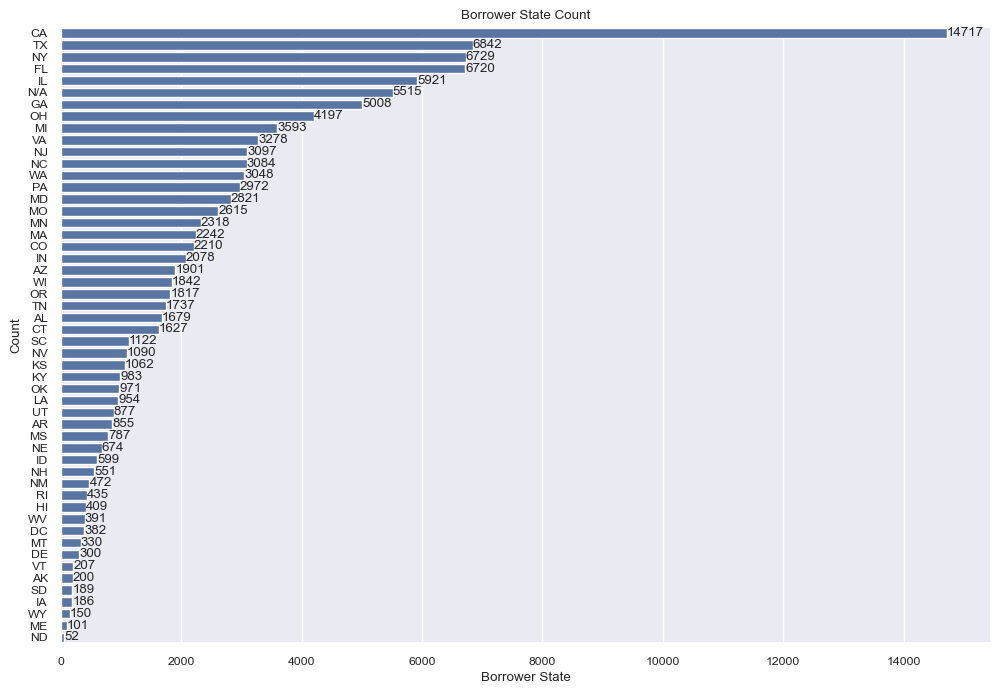

In [9]:
sorted_values = loan_data.BorrowerState.value_counts().sort_values(ascending=False)
rcParams['figure.figsize'] = 12,8
base_color = sns.color_palette()[0]
sns.set(font_scale=0.8) #Added as change to satisfy requirement "Each Visualization has to fit on a single slide"
plot = sns.barplot(x=sorted_values, y=sorted_values.index, color = base_color)
plot.bar_label(plot.containers[0])
plt.title('Borrower State Count')
plt.xlabel('Borrower State')
plt.ylabel('Count');

## Visualization 2

The second visualizations goes over the relationship between Income range in this dataset and the loan status. This relationship is depicted by the loan status total for each income range.
As we can see below, the borrowers with an income range of 50,000-74,999 dollars are more likely to have their loans still ongoing, while the lower income range borrowers of 25,000-49,999 dollars are more likely to complete their loans than other borrowers.
Interestingly, borrowers with an income range of more than 100,000 dollars are more likely to still have open credit lines than closed ones, they are also less likely to close their credit lines than most of the other income ranges, except the income range of 1-24,999 dollars.

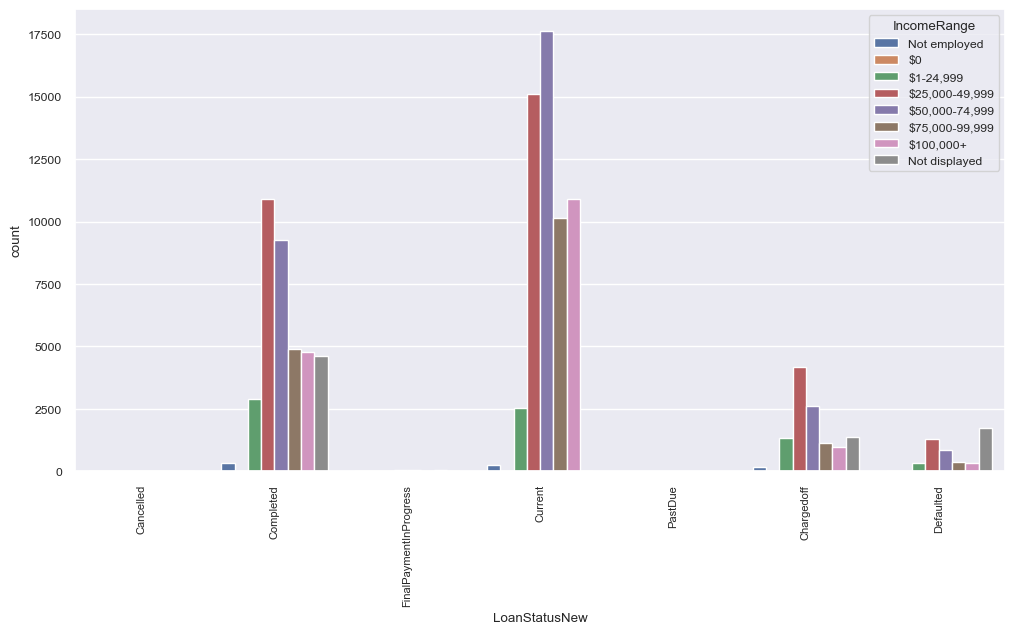

In [5]:
#Plotting a chart depicting a relationship between LoanStatus and IncomeRange
counts = loan_data.groupby(['LoanStatus', 'IncomeRange']).size()    
counts = counts.reset_index(name='Count')
counts.pivot(index='LoanStatus', columns='IncomeRange', values='Count')
#Combining the pastdue dates into one category
loan_data['LoanStatusNew'] = np.where(loan_data.LoanStatus.str.contains('Past Due'), "Past Due", loan_data.LoanStatus)
LoanStatus_ordered = ['Cancelled', 'Completed', 'FinalPaymentInProgress', 'Current', 'PastDue', 'Chargedoff', 'Defaulted']
IncomeRange_ordered = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']
#Setting up an order for the relevant variables
status_order=['Canceled', 'Completed', 'FinalPaymentInProgress', 'Current', ]
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_data, x='LoanStatusNew', hue='IncomeRange', order=LoanStatus_ordered, hue_order=IncomeRange_ordered)
plt.xticks(rotation=90, fontsize=8)
plt.show();

## Visualization 3

The final visualization will cover the impact that that ongoing credit lines and the number of credit lines opened in the last 7 years have on a borrower's credit grade.
It seems that this impact is quite substantial, as borrowers who have the least amount of ongoing credit lines and more credit lines opened in the last 7 years are more likely to get a better grading, this could be mainly attributed to an effinity to complete their loans and not incur more and more loans on top of their existing ones.
We notice that the credit grades of A and B are more prevalent in the lower range of open credit lines

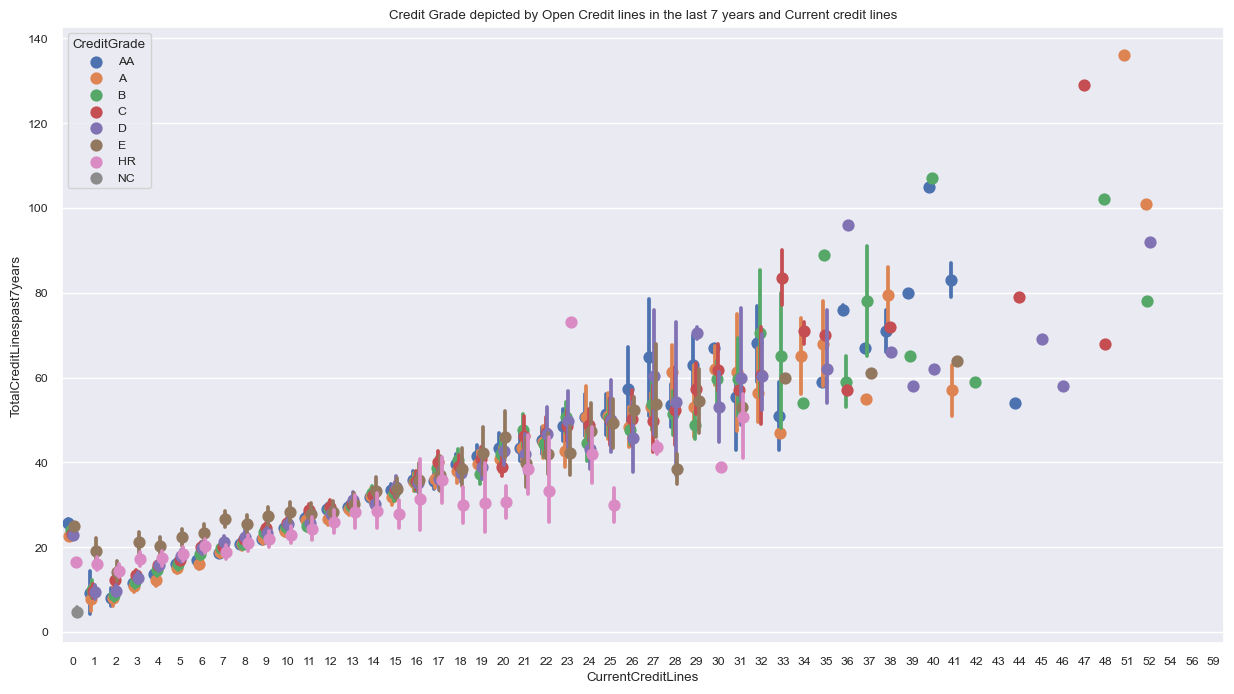

In [6]:
CreditGrade_ordered = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
plt.figure(figsize=[15,8])
sns.pointplot(data=loan_data, x='CurrentCreditLines', y='TotalCreditLinespast7years', hue='CreditGrade', 
hue_order=CreditGrade_ordered, dodge=0.4, linestyles='')
plt.title('Credit Grade depicted by Open Credit lines in the last 7 years and Current credit lines')
plt.show();

In [10]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 839701 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\simo-\AppData\Roaming\Python\Python310\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\simo-\AppData\Roaming\Python\Python310\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\simo-\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "C:\Users\si